In [1]:
# install.packages("neuralnet")
# install.packages("ggplot2")
# install.packages("caret")

In [2]:
# library(dplyr)
library(neuralnet)
library(ggplot2)
library(caret)
library(tibble)

Loading required package: lattice


In [3]:
help(neuralnet)

# The Data

In [4]:
rawdata <- read.csv("breast_cancer_data.csv", sep=",")

In [5]:
#Lets clean the data a little
data <- rawdata[,-c(0:1)]
data$diagnosis <- as.factor(data$diagnosis)
# the 32 column is not right
data[,32] <- NULL

In [6]:
head(data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Train Test Split

In [7]:
set.seed(1234)
data_index <- createDataPartition(data$diagnosis, p=0.7, list=FALSE)
train_data_X <- data[data_index, -1]
train_data_y <- data[data_index, 1]=='M'
test_data_X <- data[-data_index, -1]
test_data_y <-data[-data_index, 1]=='M'

In [8]:
train=data.frame(train_data_y, train_data_X)
train

,train_data_y,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,TRUE,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
3,TRUE,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
4,TRUE,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
10,TRUE,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,⋯,15.09,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
11,TRUE,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,⋯,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
13,TRUE,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,⋯,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
14,TRUE,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,⋯,16.84,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287
15,TRUE,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,⋯,15.03,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310
16,TRUE,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,⋯,17.46,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410


![](./Networks_4.svg)

### The Sigmoid Function

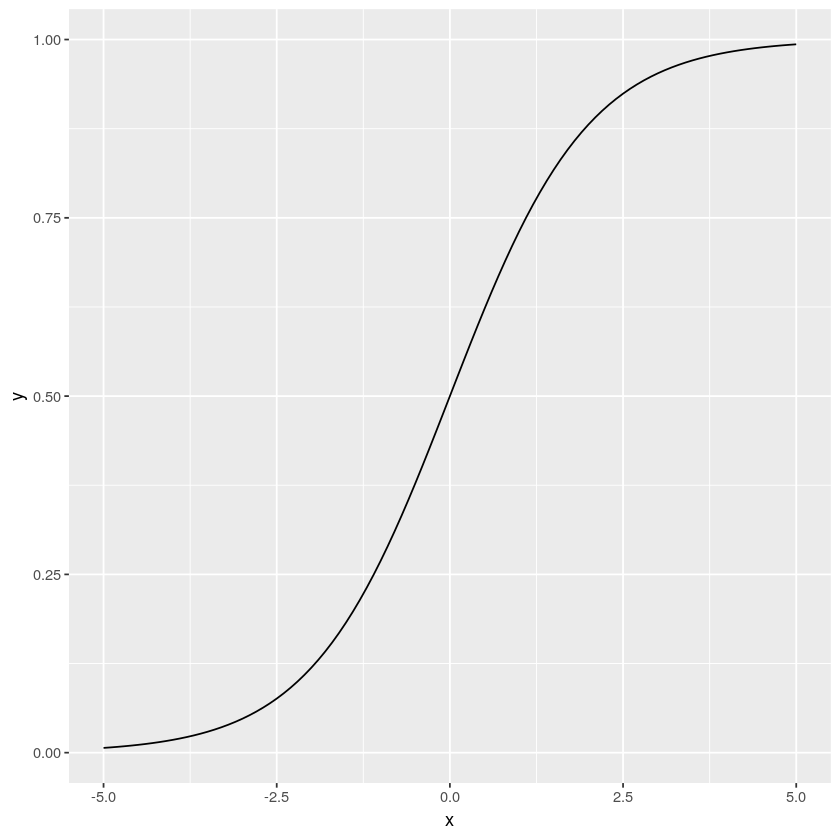

In [9]:
logist <- function(x){
  y = 1 / (1 + exp(-x))
}
p1 <- ggplot(tibble())
p1 + stat_function(aes(-5:5), fun = logist) + xlab("x")

![](pngwave.png)

# Initialize Artificial Neural Network

In [10]:
set.seed(42)
nn=neuralnet(train_data_y ~ ., 
             data=train, 
             hidden=c(50,5), 
             lifesign='full',
             algorithm='backprop',
             learningrate=0.001,
             threshold=0.01,
             rep=1,
             linear.output=FALSE)

hidden: 50, 5    thresh: 0.01    rep: 1/1    steps:    1000	min thresh: 0.441411830205445
                                                       2000	min thresh: 0.425272083837252
                                                       3000	min thresh: 0.190913536787886
                                                       4000	min thresh: 0.107968214748922
                                                       5000	min thresh: 0.0721652926770795
                                                       6000	min thresh: 0.0526476922378954
                                                       7000	min thresh: 0.0406546209498755
                                                       8000	min thresh: 0.0325923483641238
                                                       9000	min thresh: 0.0268387458557384
                                                      10000	min thresh: 0.0225491157715334
                                                      11000	min thresh: 0.0192422554155631
   

In [ ]:
# print(nn)
# plot(nn)

In [12]:
nn$result.matrix

error,2.415072e+01
reached.threshold,9.999206e-03
steps,1.607800e+04
Intercept.to.1layhid1,1.370958e+00
radius_mean.to.1layhid1,-5.646982e-01
texture_mean.to.1layhid1,3.631284e-01
perimeter_mean.to.1layhid1,6.328626e-01
area_mean.to.1layhid1,4.042683e-01
smoothness_mean.to.1layhid1,-1.061245e-01
compactness_mean.to.1layhid1,1.511522e+00
concavity_mean.to.1layhid1,-9.465904e-02


In [13]:
test=data.frame(test_data_X)

In [14]:
nn.results=compute(nn,test)
results <- data.frame(actual = test_data_y, prediction = nn.results$net.result)
results

,actual,prediction
,<lgl>,<dbl>
1,TRUE,0.9856103
5,TRUE,0.1871773
6,TRUE,0.9679749
7,TRUE,0.9679749
8,TRUE,0.9679749
9,TRUE,0.1871773
12,TRUE,0.9679749
20,FALSE,0.1871773
21,FALSE,0.1871773


In [15]:
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
table(actual,prediction)

      prediction
actual   0   1
     0 107   0
     1  22  41

# A Very Toy Example

In [16]:
input1=c(20,10,30,20,80,30)/100
input2=c(90,20,20,50,50,80)/100

truth=c(1,0,0,1,1,1)
# Here, you will combine multiple columns or features into a single set of data
df=data.frame(truth,input1,input2)
df

truth,input1,input2
<dbl>,<dbl>,<dbl>
1,0.2,0.9
0,0.1,0.2
0,0.3,0.2
1,0.2,0.5
1,0.8,0.5
1,0.3,0.8


In [17]:
# fit neural network
nn=neuralnet(truth ~ input1+input2, 
             data=df, 
             hidden=c(3), 
             linear.output=FALSE)

In [18]:
print(nn)
plot(nn)

$call
neuralnet(formula = truth ~ input1 + input2, data = df, hidden = c(3), 
    linear.output = FALSE)

$response
  truth
1     1
2     0
3     0
4     1
5     1
6     1

$covariate
     input1 input2
[1,]    0.2    0.9
[2,]    0.1    0.2
[3,]    0.3    0.2
[4,]    0.2    0.5
[5,]    0.8    0.5
[6,]    0.3    0.8

$model.list
$model.list$response
[1] "truth"

$model.list$variables
[1] "input1" "input2"


$err.fct
function (x, y) 
{
    1/2 * (y - x)^2
}
<bytecode: 0x55a0593b62f8>
<environment: 0x55a064649318>
attr(,"type")
[1] "sse"

$act.fct
function (x) 
{
    1/(1 + exp(-x))
}
<bytecode: 0x55a0593c2918>
<environment: 0x55a0646497b0>
attr(,"type")
[1] "logistic"

$linear.output
[1] FALSE

$data
  truth input1 input2
1     1    0.2    0.9
2     0    0.1    0.2
3     0    0.3    0.2
4     1    0.2    0.5
5     1    0.8    0.5
6     1    0.3    0.8

$exclude
NULL

$net.result
$net.result[[1]]
          [,1]
[1,] 0.9906741
[2,] 0.0857410
[3,] 0.1422116
[4,] 0.8571457
[5,] 0.9614236
[6,

In [19]:
# creating test set
input1=c(30,30,85)/100
input2=c(85,10,40)/100

test=data.frame(input1,input2)

In [20]:
## Prediction using neural network
Predict=compute(nn,test)
Predict$net.result

0.98981090
0.05001758
0.91527967


In [21]:
ALPHA=0.1 # learning parameter.... step_size

nodes=c(2,3,1) # 5 inputs, 2 hidden layers, with 7 and 10 nodes , 1 output

nlayers=length(nodes) -1 # 3 sets of weights

# Initialize Artificial Neural Network

In [22]:
net=list() # set up empty list
# net[[ j ]] holds weight matrix feeding nodes of layer j+1 from nodes in layer j

set.seed(42)
# make weights and fill with random numbers
for(j in 1:nlayers) net[[ j ]] <- (matrix(runif(nodes[ j ]*nodes[ j +1 ]),nodes[j+1],nodes[j]) - 0.5)
net

[[1]]
           [,1]       [,2]
[1,]  0.4148060 0.33044763
[2,]  0.4370754 0.14174552
[3,] -0.2138605 0.01909595

[[2]]
          [,1]       [,2]      [,3]
[1,] 0.2365883 -0.3653334 0.1569923

# Forward Pass

In [23]:
netsays <- function(x) { # Returns net output for some input vector x
  for(j in 1:nlayers) x <- 1/(1+exp(-net[[ j ]] %*% x))
  return(x)
}

print(netsays(t(df[,-1])))

          [,1]     [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.5039473 0.503303 0.5021143 0.5032493 0.4996885 0.5031735


# Our ANN's Accuracy

In [24]:
netsays(t(test))

0.5032585,0.5019324,0.4992267


# Back Propagation

In [25]:
backprop <- function(layer,n1, n2, factor){ # recursive function used for back-propagation
  if(layer>1) for(n in 1:nodes[layer-1])
    backprop(layer-1,n2,n,factor*net[[layer]][n1,n2]*r[[layer]][n2]*(1-r[[layer]][n2]))
  net[[layer]][n1,n2] <<- net[[layer]][n1,n2] - ALPHA*factor*r[[layer]][n2]
}

# Gradient Descent 

In [26]:
netlearns <- function(x,truth) { # like netsays but changes weights
  r <<- list() # to contain the outputs of all nodes in all layers
  r[[1]] <<- x # the input layer
  for(layer in 1:nlayers) r[[layer+1]] <<- as.vector(1/(1+exp(-net[[layer]] %*% r[[layer]])))
  u <- r[[nlayers+1]] # final answer, for convenience
  for(n in 1:nodes[nlayers]) backprop(nlayers,1,n,(u-truth)*u*(1-u))
}

In [27]:
for(i in 1:5000){
    for(i in 1:6) netlearns(t(df[i,-1]), df[i,1])
}

In [28]:
netsays(t(test))

0.9779823,0.02916231,0.7521905


# An Answer

In [29]:
sample <- read.table("Sample1.txt",header=FALSE)

In [30]:
head(sample)

,V1,V2,V3,V4,V5,V6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-0.059978730,3.881889,1.0607440,4.022852,-0.05597012
2,1,0.881978000,2.055923,3.1585140,1.972982,1.19097300
3,0,0.077789470,3.950015,0.9496442,3.976893,0.04745127
4,1,0.975983300,2.032230,2.9900490,2.017683,1.06281300
5,0,-0.001502924,3.862673,0.8942838,4.020337,-0.02683437
6,0,0.073092370,3.982063,1.0439070,3.860677,-0.13946140


In [31]:
# fit neural network
nn=neuralnet(V1 ~ ., 
             data=sample, 
             lifesign='full',
             hidden=c(8,5), 
             linear.output=FALSE)

hidden: 8, 5    thresh: 0.01    rep: 1/1    steps:      22	error: 0.00674	time: 0.02 secs


In [32]:
Predict=compute(nn,sample)
# Predict$net.result

In [33]:
results <- data.frame(actual = sample$V1, 
                      prediction = Predict$net.result)
head(results)

,actual,prediction
,<int>,<dbl>
1,0,0.003782127
2,1,0.996466719
3,0,0.003788244
4,1,0.996464589
5,0,0.003783586
6,0,0.003783776


In [34]:
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
table(actual,prediction)

The following objects are masked from roundedresultsdf (pos = 3):

    actual, prediction



      prediction
actual   0   1
     0 534   0
     1   0 466

In [35]:
sample_test <- read.table("Sample2.txt",header=FALSE)

In [36]:
head(sample_test)

,V1,V2,V3,V4,V5,V6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1.5870520,4.715568,-0.8595715,1.5040090,2.1454170
2,1,2.5206200,2.682234,3.9096930,0.2611399,0.3924642
3,1,-0.5450664,-1.449915,-0.2813677,4.0579420,0.9299015
4,0,-1.0479510,4.223808,3.0683020,9.6731960,3.9158380
5,1,-2.8632640,1.250906,0.2937350,-0.2080808,-0.6673748
6,1,-0.2963963,2.988054,1.4497160,2.3261870,-0.5594592


In [37]:
PredictTest=compute(nn,sample_test)

In [38]:
results_test <- data.frame(actual = sample_test$V1, 
                           prediction = PredictTest$net.result)
head(results_test)

,actual,prediction
,<int>,<dbl>
1,0,0.996171792
2,1,0.996466768
3,1,0.189931704
4,0,0.956760944
5,1,0.003802225
6,1,0.003807829


In [39]:
roundedresults<-sapply(results_test,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
table(actual,prediction)

The following objects are masked from roundedresultsdf (pos = 3):

    actual, prediction

The following objects are masked from roundedresultsdf (pos = 4):

    actual, prediction



      prediction
actual   0   1
     0 354 142
     1 143 361